In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<h1><strong>1. Exploratory analysis to see some attributes' relationship to game result</strong></h1>

In [5]:
#import data
data = pd.read_csv("high_diamond_ranked_10min.csv")
#check if there is any null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
gameId                          9879 non-null int64
blueWins                        9879 non-null int64
blueWardsPlaced                 9879 non-null int64
blueWardsDestroyed              9879 non-null int64
blueFirstBlood                  9879 non-null int64
blueKills                       9879 non-null int64
blueDeaths                      9879 non-null int64
blueAssists                     9879 non-null int64
blueEliteMonsters               9879 non-null int64
blueDragons                     9879 non-null int64
blueHeralds                     9879 non-null int64
blueTowersDestroyed             9879 non-null int64
blueTotalGold                   9879 non-null int64
blueAvgLevel                    9879 non-null float64
blueTotalExperience             9879 non-null int64
blueTotalMinionsKilled          9879 non-null int64
blueTotalJungleMinionsKilled    9879 non-null int64
blueGol

In [6]:
#quick glimpse of the data
data.head()
#Data looks pretty clean. Since the data is ten minutes in game, so there is no need to drop remakes.

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [7]:
data.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


<h3><em>First let's see if starting on a particular side grants certain advantage</em></h3>

blue total wins: 4930
red total wins: 4949


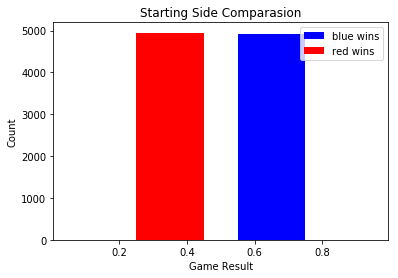

In [8]:
#Separate data into blue-won games and blue-lost games
bw_game = data.loc[data['blueWins'] == 1].copy()
bl_game = data.loc[data['blueWins'] == 0].copy()

#how many games won and lost by blue team
bw = bw_game['blueWins']
rw = bl_game['blueWins']

print('blue total wins: ' + str(bw.count()) + '\n' + 'red total wins: ' + str(rw.count()))

b,r = plt.subplots(1, 1)

plt.hist([bw_game['blueWins'], bl_game['blueWins']], bins = 2, color=['blue', 'red'],label = ['blue wins','red wins'])
plt.legend(loc = 'upper right')

plt.title('Starting Side Comparasion')
plt.xlabel('Game Result')
plt.ylabel('Count')

plt.show()



*From the plot and figuer we can see that it does not matter much as to start on a particular side of the map.*

<h3><em>How kills, deathes and assists affect game result</em></h3>

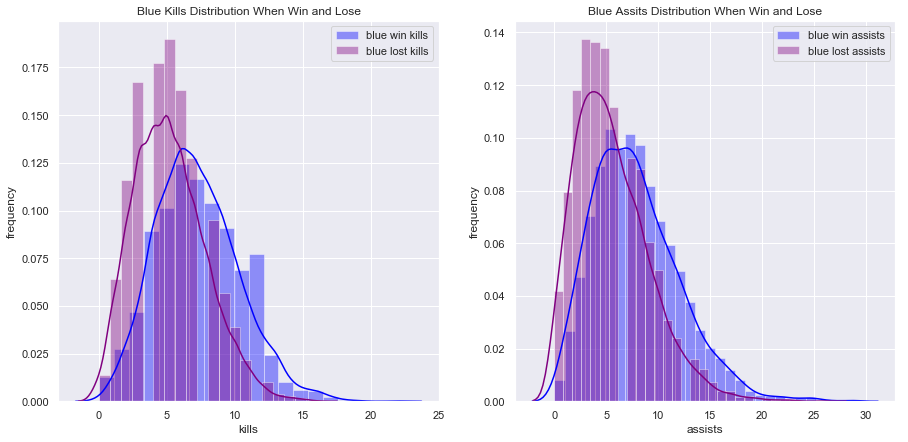

In [9]:
sns.set(style = 'darkgrid')
f, axe = plt.subplots(1,2, figsize =(15,7))

sns.distplot(bw_game['blueKills'], bins = 20, label = 'blue win kills', color = 'blue',ax= axe[0])
sns.distplot(bl_game['blueKills'], bins = 20, label = 'blue lost kills', color = 'purple',ax= axe[0])

axe[0].set_title('Blue Kills Distribution When Win and Lose')
axe[0].set_xlabel('kills')
axe[0].set_ylabel('frequency')
axe[0].legend()


sns.distplot(bw_game['blueAssists'], bins = 30, label = 'blue win assists', color = 'blue',ax= axe[1])
sns.distplot(bl_game['blueAssists'], bins = 30, label = 'blue lost assists', color = 'purple',ax= axe[1])

axe[1].set_title('Blue Assits Distribution When Win and Lose')
axe[1].set_xlabel('assists')
axe[1].set_ylabel('frequency')
axe[1].legend()
plt.show()

*Here I only listed kills and assists since deathes are directly dependant to kills.*  
*The analysis shows that when team have more kills and assists, they are more likely to win.*

<h3><em>Does vision control makes an impact on team KDA</em></h3>

The linear correlation between vision and KDA is: 0.11331756635322085


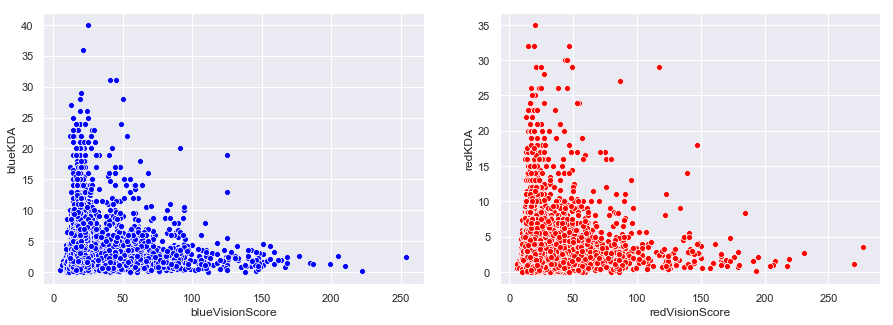

In [10]:

#Calculate vision score by adding up wards placed and destroyed
data['blueVisionScore'] = data['blueWardsPlaced'] + data['blueWardsDestroyed']
data['redVisionScore'] = data['redWardsPlaced'] + data['redWardsDestroyed']

#Caculate KDA by the formula KDA = (Kills + Assits)/Deaths
data['blueKDA'] = (data['blueKills'] + data['blueAssists'])/data['blueDeaths']
data['redKDA'] = (data['redKills'] +data['redAssists'])/data['redDeaths']

f, a =plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(x=data['blueVisionScore'], y=data['blueKDA'], color='blue',ax=a[0])
sns.scatterplot(x=data['redVisionScore'], y=data['redKDA'], color='red',ax=a[1])

vis_KDA_corr = data['blueVisionScore'].corr(data['blueKDA'], method='spearman')
print('The linear correlation between vision and KDA is: {}'.format(vis_KDA_corr))

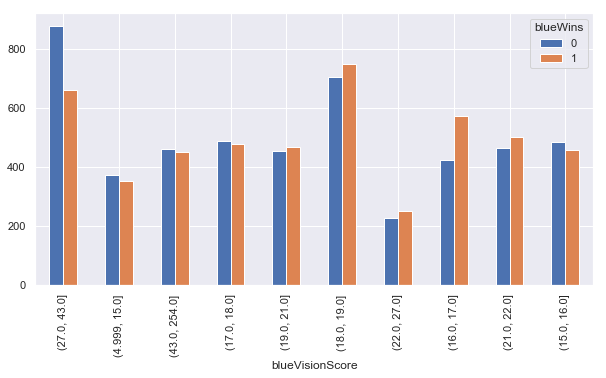

In [11]:
#if it does little to KDA, how does it directly correlate to game result?
vis_bins = pd.qcut(data['blueVisionScore'], 10)
pd.crosstab(vis_bins, data['blueWins']).plot(kind='bar',figsize=(10,5))

*From above analysis, we are able to tell that vision control is relatively irrelevant in Diamond-elo games*

<h3><em>Dragon for the Win?<em><h3>

Text(0.9,2400,'2292')

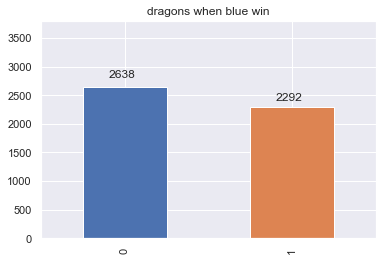

In [12]:
bar1 = bw_game['blueDragons'].value_counts().plot(kind='bar', ylim=(0,3800), title='dragons when blue win')
bar1.annotate(bw_game[bw_game['blueDragons'] == 0]['blueDragons'].count(), xy=(-0.1, 2800))
bar1.annotate(bw_game[bw_game['blueDragons'] == 1]['blueDragons'].count(), xy=(0.9, 2400))

Text(0.9,1400,'1284')

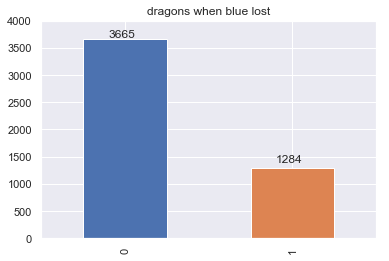

In [13]:
bar2 = bl_game['blueDragons'].value_counts().plot(kind='bar', ylim=(0,4000), title='dragons when blue lost')
bar2.annotate(bl_game[bl_game['blueDragons'] == 0]['blueDragons'].count(), xy=(-0.1, 3700))
bar2.annotate(bl_game[bl_game['blueDragons'] == 1]['blueDragons'].count(), xy=(0.9, 1400))

*It seems when a team lose, they are likely to have no dragons in the first 10 min* 

<h3><em>let's take a look at the gold and experience<em><h3>

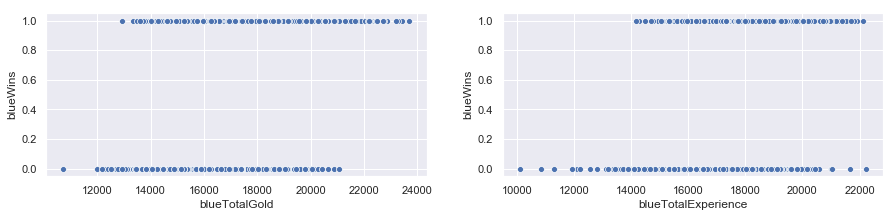

In [14]:
#To see the relationship that total gold and exp have with the game result 
f, p= plt.subplots(1,2, figsize=(15,3))
sns.scatterplot(x=data['blueTotalGold'],y=data['blueWins'], ax=p[0])
sns.scatterplot(x=data['blueTotalExperience'],y=data['blueWins'], ax=p[1])

*We see that for the 'total gold' feature, there seems to be two clear thresholds that separate the data set*  
*Let's find out*

In [15]:
#Take out the feature we need
df_tot_gold = data[['blueTotalGold','blueWins']].sort_values(by='blueTotalGold').reset_index()
first_thresh = 0
second_thresh = 0
total_games = data['blueTotalGold'].count()

for i in range(total_games - 1):
    if df_tot_gold.iloc[i, 2] != 0:
        first_thresh = i
        break
        
    
for i in range(total_games-1):
    if df_tot_gold.iloc[-i -1, 2] == 0:
        second_thresh = -i -1
        break

print('The first threshold is where blue totle gold = {}, blue loses when they have less total gold'.format(df_tot_gold.iloc[first_thresh, 1]))
print('The second threshold is where blue totle gold = {}, blue wins when they have more total gold'.format(df_tot_gold.iloc[second_thresh, 1]))
        


The first threshold is where blue totle gold = 12939, blue loses when they have less total gold
The second threshold is where blue totle gold = 21055, blue wins when they have more total gold


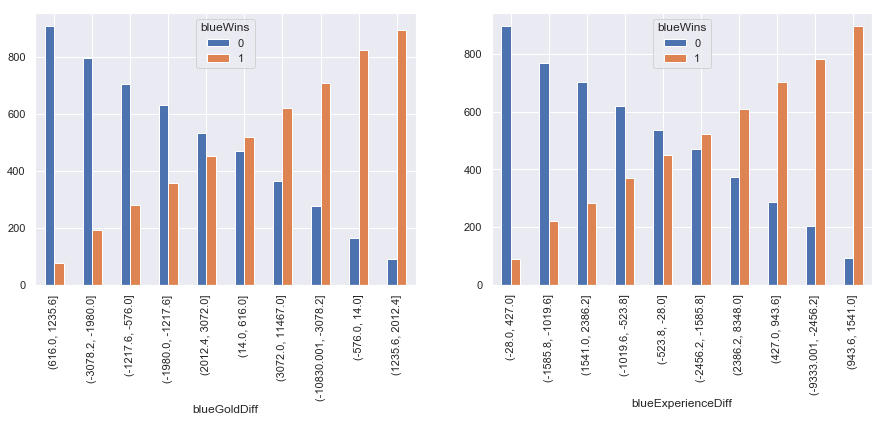

In [16]:
#Take another approach to see how gold and exp correlate with game results
gold_bins = pd.qcut(data['blueGoldDiff'], 10)
exp_bins = pd.qcut(data['blueExperienceDiff'], 10)

f,p = plt.subplots(1,2, figsize=(15, 5))

gold_p = pd.crosstab(gold_bins, data['blueWins']).plot(kind='bar',ax=p[0])
exp_p = pd.crosstab(exp_bins, data['blueWins']).plot(kind='bar', ax=p[1])


*Apparently it is a positive correlation between (gold/exp, result)*

<h3><em>Lastly, we examine the impact of towers<em><h3>

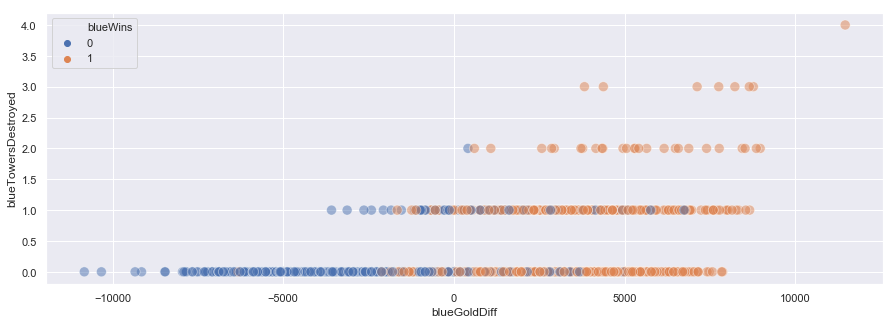

In [17]:
f,p = plt.subplots(figsize=(15, 5))
sns.scatterplot(y=data['blueTowersDestroyed'], x=data['blueGoldDiff'], hue=data['blueWins'], alpha=0.5, ax=p, s=100)

*Generally, more tower destroyed at 10 mins, the team is more likely to bigger gold diff, thus more likely to win

<h1>2. Model Selection and Tuning</h1>

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings

warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)

In [19]:
#feature selection -- based on the exploratory analysis and personal game experience

feature_cols = ['blueKills','blueDeaths','blueAssists','blueDragons','blueTowersDestroyed','blueGoldDiff','blueExperienceDiff']
X = data[feature_cols]
y = data.blueWins

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=111)

In [20]:
#i want to see a correlation matrix]\
full_cols = feature_cols
full_cols.append("blueWins")
data[full_cols].corr()

,blueKills,blueDeaths,blueAssists,blueDragons,blueTowersDestroyed,blueGoldDiff,blueExperienceDiff,blueWins
blueKills,1.000000,0.004044,0.813667,0.170436,0.180314,0.654148,0.583730,0.337358
blueDeaths,0.004044,1.000000,-0.026372,-0.188852,-0.071441,-0.640000,-0.577613,-0.339297
blueAssists,0.813667,-0.026372,1.000000,0.170873,0.123663,0.549761,0.437002,0.276685
blueDragons,0.170436,-0.188852,0.170873,1.000000,0.039750,0.233875,0.211496,0.213768
blueTowersDestroyed,0.180314,-0.071441,0.123663,0.039750,1.000000,0.294060,0.218320,0.115566
blueGoldDiff,0.654148,-0.640000,0.549761,0.233875,0.294060,1.000000,0.894729,0.511119
blueExperienceDiff,0.583730,-0.577613,0.437002,0.211496,0.218320,0.894729,1.000000,0.489558
blueWins,0.337358,-0.339297,0.276685,0.213768,0.115566,0.511119,0.489558,1.000000


*Logistic Regression*

In [21]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [22]:
cm = metrics.confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[873 348]
 [344 905]]


In [23]:
#Since some of my selected attributes are not on the same scale, I want to see if standardizing make a difference in LR
from sklearn.preprocessing import StandardScaler 

sc_x = StandardScaler() 
X_train1 = sc_x.fit_transform(X_train)  
X_test1 = sc_x.transform(X_test)


logreg.fit(X_train1, y_train)

y_pred1 = logreg.predict(X_test1)

In [24]:
cm1 = metrics.confusion_matrix(y_test, y_pred1)
print ("Confusion Matrix : \n", cm1)

Confusion Matrix : 
 [[880 341]
 [340 909]]


Text(0.5,257.44,'Predicted label')

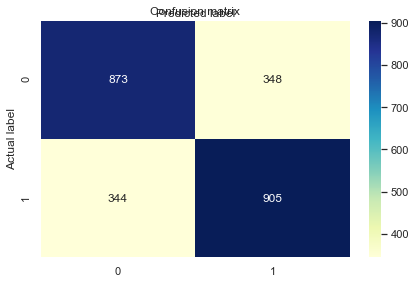

In [25]:
fig, axe = plt.subplots()
c = [0,1]
plt.xticks(c, c)
plt.yticks(c, c)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
axe.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.719838056680162
Precision: 0.722266560255387
Recall: 0.7245796637309848


*Support Vector Machine*

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [28]:
def print_results(results):
    print("BEST PARAMS: {}\n".format(results.best_params_))
    
    means = results.cv_results_["mean_test_score"]
    stds = results.cv_results_["std_test_score"]
    params = results.cv_results_["params"]
    
    for mean, std, param in zip(means, stds, params):
        print("{} (+/-{}) for {}".format(round(mean,3), round(std*2, 3), param))
    

In [29]:
svc = SVC()

parameters = {
    "kernel":["linear", "rbf"],
    "C":[0.1, 1, 10]
}

cv_svc = GridSearchCV(svc, parameters, cv = 5)
cv_svc.fit(X_train1, y_train.values.ravel())
print_results(cv_svc)

BEST PARAMS: {'C': 1, 'kernel': 'rbf'}

0.733 (+/-0.011) for {'C': 0.1, 'kernel': 'linear'}
0.733 (+/-0.018) for {'C': 0.1, 'kernel': 'rbf'}
0.733 (+/-0.011) for {'C': 1, 'kernel': 'linear'}
0.734 (+/-0.016) for {'C': 1, 'kernel': 'rbf'}
0.733 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.731 (+/-0.018) for {'C': 10, 'kernel': 'rbf'}


*We can see the SVM does a better job than Logistic Regression overall*

*Random Forest*

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier()

parameters = {
    "n_estimators":[20, 50, 100],
    "max_depth":[3, 5, 20]
}

cv_rf = GridSearchCV(rf, parameters, cv = 5)
cv_rf.fit(X_train, y_train.values.ravel())
print_results(cv_rf)

BEST PARAMS: {'max_depth': 5, 'n_estimators': 100}

0.729 (+/-0.015) for {'max_depth': 3, 'n_estimators': 20}
0.731 (+/-0.015) for {'max_depth': 3, 'n_estimators': 50}
0.732 (+/-0.015) for {'max_depth': 3, 'n_estimators': 100}
0.732 (+/-0.018) for {'max_depth': 5, 'n_estimators': 20}
0.735 (+/-0.015) for {'max_depth': 5, 'n_estimators': 50}
0.735 (+/-0.021) for {'max_depth': 5, 'n_estimators': 100}
0.7 (+/-0.014) for {'max_depth': 20, 'n_estimators': 20}
0.711 (+/-0.018) for {'max_depth': 20, 'n_estimators': 50}
0.712 (+/-0.017) for {'max_depth': 20, 'n_estimators': 100}


*Gradient Boosting*

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
gb = GradientBoostingClassifier()

parameters = {
    "learning_rate":[0.01, 0.1, 1],
    "n_estimators":[50, 250, 500],
    "max_depth":[1, 3, 5, 7, 9]
}

cv_gb = GridSearchCV(gb, parameters, cv=5)
cv_gb.fit(X_train, y_train.values.ravel())
print_results(cv_gb)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 250}

0.727 (+/-0.02) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.73 (+/-0.018) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.733 (+/-0.011) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.727 (+/-0.018) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.729 (+/-0.012) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.729 (+/-0.01) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.725 (+/-0.017) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.727 (+/-0.018) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.725 (+/-0.023) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
0.719 (+/-0.02) for {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50}
0.721 (+/-0.014) for {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 250}
0.722 (+/-0.013) for {'learning_

*Evaluate models*

In [45]:
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score


def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()

    accuracy = round(accuracy_score(labels, pred), 4)
    precision = round(precision_score(labels, pred), 4)
    recall = round(recall_score(labels, pred), 4)

    print("{}--Accuracy: {}/Precision: {}/Recall: {}/Latency: {}".format(name, accuracy, precision, recall, end - start))


In [46]:
evaluate_model("SVM",cv_svc.best_estimator_, X_test1, y_test)
evaluate_model("RF",cv_rf.best_estimator_, X_test, y_test)
evaluate_model("GB",cv_gb.best_estimator_, X_test, y_test)

SVM--Accuracy: 0.7178/Precision: 0.7244/Recall: 0.7134/Latency: 0.3008272647857666
RF--Accuracy: 0.715/Precision: 0.7235/Recall: 0.7062/Latency: 0.04297637939453125
GB--Accuracy: 0.7166/Precision: 0.7234/Recall: 0.7118/Latency: 0.004996061325073242


## Conclusion

It turns out that logistic regression is the strongest performer here with accuracy more approaching 0.72

There are some things can be delved into in further analyses:
1. Research on how to use the vision score. In the correlation plot, there is somewhat a shape of an inverse function

2. There are other important predictors that were absent in the dataset such as the champion, and the patch, etc.